In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
data = pd.read_csv('../../NumericData/telecom.csv')

In [20]:
#Description of important features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [21]:
df = data.describe()
df.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


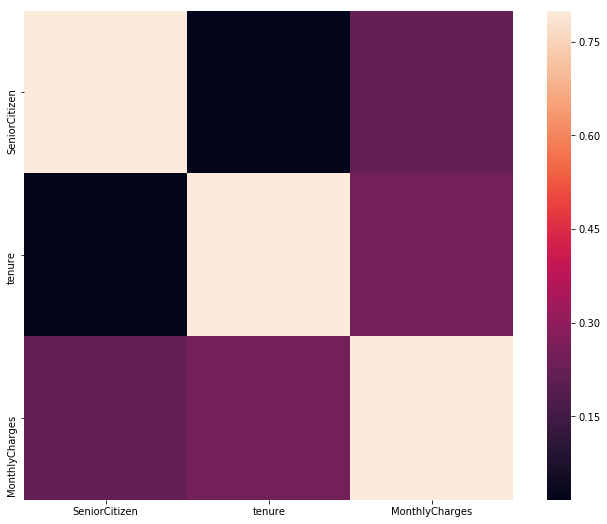

In [22]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
# TODO: Total number of records
n_records = len(data)

n_chruns_yes = len(data.query('Churn == "Yes"'))

n_chruns_no = len(data.query('Churn == "No"'))

# TODO: Percentage of individuals whose retain service
greater_percent = (float(n_chruns_no) / n_records * 100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals keeping the service: {}".format(n_chruns_no))
print("Individuals will drop the service: {}".format(n_chruns_yes))
print("Percentage of individuals keeping the service: {:.2f}%".format(greater_percent))


Total number of records: 7043
Individuals keeping the service: 5174
Individuals will drop the service: 1869
Percentage of individuals keeping the service: 73.46%


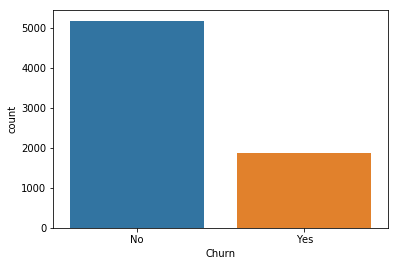

In [27]:
sns.countplot(data['Churn'],label="Count")

In [28]:
#10% noisy data
data = pd.read_csv('../../NumericData/10_noisy_telecom.csv')

In [29]:
#Description of important features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [30]:
df=data.describe()
df.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.197359,0.398034,0.00,0.000,0.0,0.00,1.00
tenure,7043.0,32.782905,24.250489,0.00,9.000,30.0,55.00,72.00
MonthlyCharges,7043.0,64.989159,29.952464,18.25,38.445,70.2,89.95,118.75


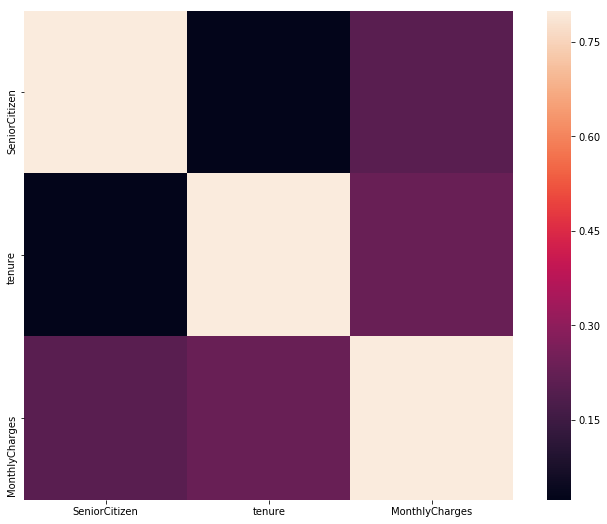

In [31]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [32]:
#20% noisy data
data = pd.read_csv('../../NumericData/20_noisy_telecom.csv')

In [33]:
#Description of important features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [34]:
df = data.describe()
df.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.232713,0.422591,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,33.041176,23.881845,0.00,10.0,30.00,55.00,72.00
MonthlyCharges,7043.0,65.076523,29.960049,18.25,38.9,69.95,90.15,118.75


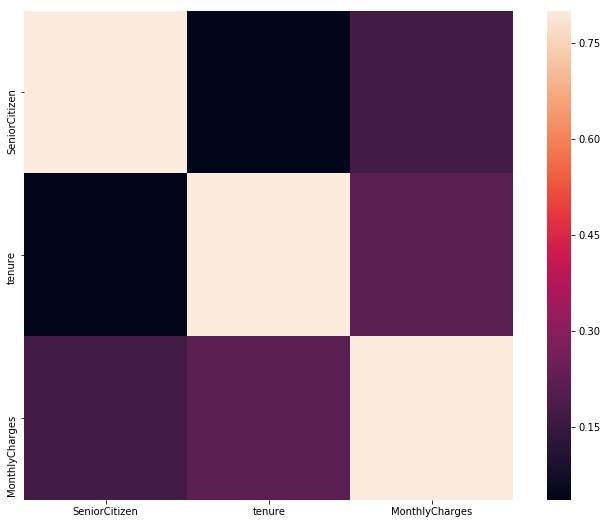

In [35]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [36]:
#30% noisy data
data = pd.read_csv('../../NumericData/30_noisy_telecom.csv')

In [37]:
#Description of important features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [38]:
df=data.describe()
df.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.268068,0.442984,0.00,0.000,0.0,1.0,1.00
tenure,7043.0,33.359364,23.644470,0.00,11.000,31.0,55.0,72.00
MonthlyCharges,7043.0,65.581576,29.919021,18.25,39.485,69.9,90.6,118.75


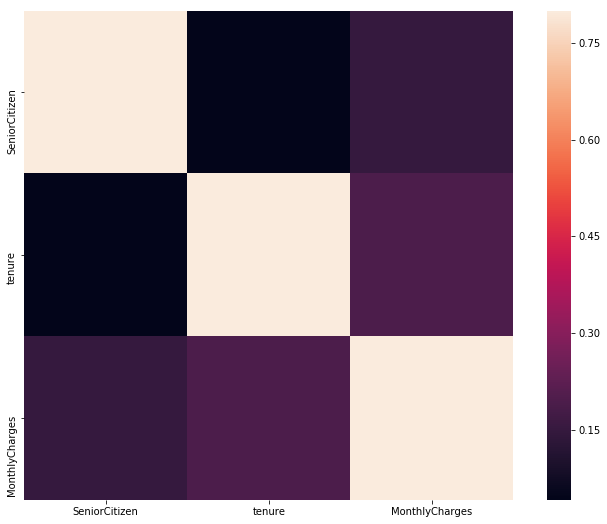

In [39]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [40]:
#40% noisy data
data = pd.read_csv('../../NumericData/40_noisy_telecom.csv')

In [41]:
#Description of important features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [42]:
df=data.describe()
df.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.309243,0.462214,0.00,0.0,0.00,1.0,1.00
tenure,7043.0,33.615931,23.250168,0.00,12.0,32.00,54.0,72.00
MonthlyCharges,7043.0,65.921140,29.741223,18.25,40.3,69.65,90.6,118.75


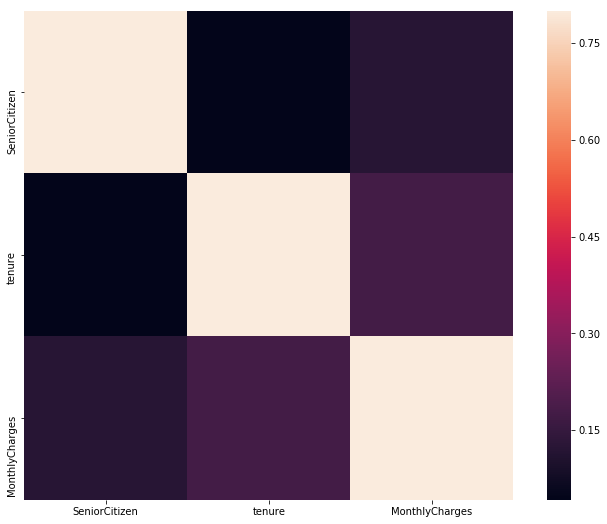

In [43]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [44]:
#50% noisy data
data = pd.read_csv('../../NumericData/50_noisy_telecom.csv')

In [45]:
#Description of important features
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [46]:
df=data.describe()
df.T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.337640,0.472939,0.00,0.00,0.0,1.00,1.00
tenure,7043.0,34.707511,23.118742,0.00,13.00,34.0,56.00,72.00
MonthlyCharges,7043.0,66.410065,29.564657,18.25,41.66,69.5,91.07,118.75


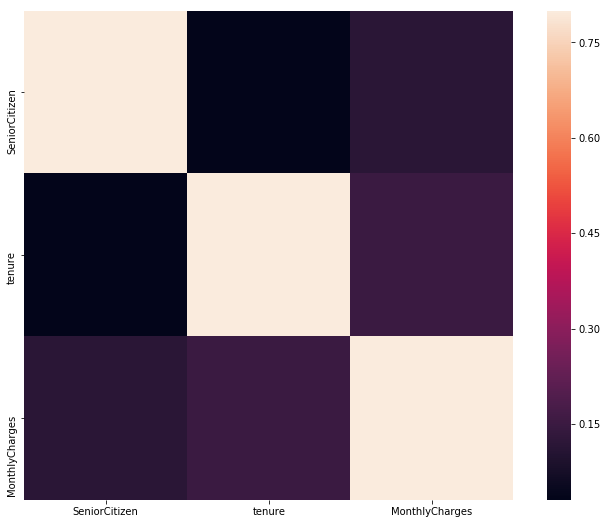

In [47]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);